<a href="https://colab.research.google.com/github/KyraZzz/spectral-clustering/blob/main/spectral_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
def generate_sample(n):
  choice = np.random.randint(low=0,high=4,size=n)
  mu = np.array([2,4,6,8])
  std = np.array([0.17,0.17,0.17,0.17])
  return np.random.normal(loc=mu[choice],scale=std[choice]),choice

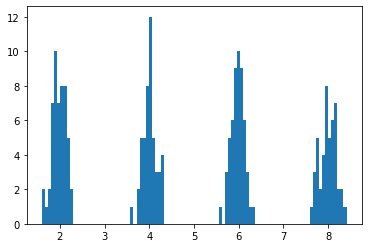

In [ ]:
x,label = generate_sample(200)
plt.hist(x, bins=100)
plt.show()

# Unnormalised spectral clustering

In [ ]:
# similarity matrix using Gaussian similarity function
"""
  Gaussian similarity function:
  s(x_i,x_j) = e^(-|x_i-x_j|^2/(2σ^2))
"""
σ = 1
length = len(x)
s = np.zeros((length, length))
for i in range(length):
  for j in range(length):
    s[i,j] = np.exp(-(np.power(x[i] - x[j],2)/(2*np.power(σ,2))))

In [ ]:
# degree matrix:
"""
  The degree of a vertex v_i is defined as
    d_i = ∑_j w_{ij}
  The degree matrix D is defined as the diagonal matrix with degrees d1, ..., dn on the diagonal
"""
# in a fully connected graph, the weight matrix is the similarity matrix
d = np.nansum(s, axis = 1)
D = np.diag(d)

In [ ]:
# unnormalised graph Laplacian
L = D - s

In [ ]:
# assert L has the following properties
"""
  1. Symmetric
  2. Positive semi-definite
  3. Smallest Eigenvalue is 0 with corresponding eigenvector 1
  4. Has n non-negative, real-valued eigenvalues >= 0
"""
assert np.all(L == L.T)
assert np.prod(L) >= 0

In [ ]:
# compute the first k eigenvectors of L
eigen_val, eigen_vec = np.linalg.eig(L)
ind = np.argsort(eigen_val)
eigen_val_sort, eigen_vec_sort = eigen_val[ind], eigen_vec[ind]

# Visualise eigenvalues & eigenvectors

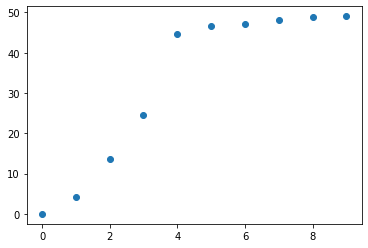

In [ ]:
k = 10
plt.scatter(np.arange(k), eigen_val_sort[:k])
plt.show()

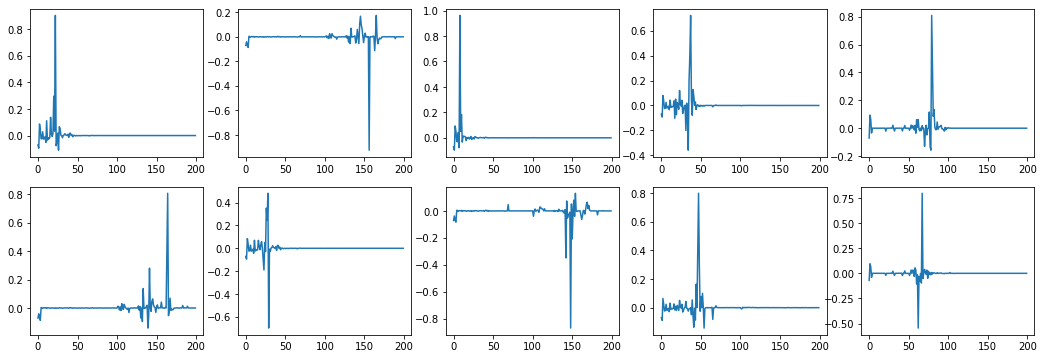

In [ ]:
rows = int(np.ceil(k/5))
fig,axes = plt.subplots(rows,5,figsize=(18,6))
cnt = 0
for i in range(rows):
  for j in range(5):
    axes[i,j].plot(eigen_vec_sort[cnt])
    cnt += 1
plt.show()

# Fit K-Means model

In [ ]:
# U: the matrix containing the k vectors as columns, U.shape = (200, 10)
k = 4
U = eigen_vec_sort[:k].T

In [ ]:
# y_i be the vector corresponding to the i_th row of U
# cluster the points y_i with k-means algorithm
km = KMeans(n_clusters=k, random_state=0)
km.fit(U)

KMeans(n_clusters=4, random_state=0)

In [ ]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

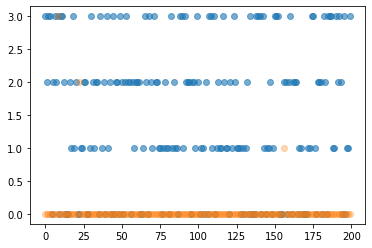

In [ ]:
fig,ax = plt.subplots()
ax.scatter(np.arange(len(label)), label, alpha=0.6)
ax.scatter(np.arange(len(km.labels_)), km.labels_, alpha=0.3)
plt.show()